In [2]:
from pyemma.coordinates.acf import acf

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
import numpy as np
from glob import glob
fnames = glob('*.npy')
systems = []
for fname in fnames:
    systems.append(list(np.load(fname)))

In [2]:
systems

[[array([50, 50, 66, ..., 36, 77,  0], dtype=int32),
  array([66, 48, 48, ..., 36,  0, 77], dtype=int32),
  array([50, 48, 48, ...,  0,  0, 36], dtype=int32)],
 [array([29, 29, 90, ..., 81, 81, 81], dtype=int32)],
 [array([56, 40, 40, ...,  1, 45, 45], dtype=int32)],
 [array([37, 56, 56, ..., 37, 23, 23], dtype=int32)]]

In [6]:
dtrajs = systems[-1]

In [7]:
fnames

['dtrajs_ntl9_lag10ns.npy',
 'dtrajs_villin_lag10ns.npy',
 'chignolin_dtrajs_lag10ns.npy',
 'dtrajs_trpcage_lag10ns.npy']

In [95]:
import pyemma

lag = 1
# dtrajs is a list of discrete trajectories
msm = pyemma.msm.estimate_markov_model(dtrajs, lag=lag)

In [97]:
projection

array([-0.4650705 , -0.46975542, -0.50162365,  2.18562292, -0.470613  ,
       -0.47490363, -0.48162725, -0.47344047, -0.44486086, -0.55106768,
       -0.46894747, -0.50372234, -0.51345061, -0.46683808,  2.07277456,
       -0.46455939, -0.45474856, -0.47422653, -0.47369376, -0.47260339,
       -0.47768474, -0.45675564, -0.49983526,  2.19904073, -0.4693582 ,
       -0.47428261, -0.46867528, -0.47454902, -0.51875835, -0.47281378,
       -0.4740471 , -0.47340785, -0.48169903, -0.32101554, -0.41445901,
       -0.48084088, -0.472419  ,  2.15242505, -0.47602646, -0.45989533,
       -0.46145118, -0.46807074, -0.30082096, -0.47340306,  0.26674956,
       -0.36223808, -0.48834735, -0.39801343, -0.49503314, -0.4777626 ,
       -0.48245505, -0.46810143, -0.46869225, -0.47490209, -0.4726818 ,
       -0.50129802,  2.20011583, -0.47736139, -0.48290542, -0.53662164,
       -0.49904774, -0.47076161, -0.48396959, -0.47154254, -0.50284437,
       -0.46752374,  1.33374334, -0.45222666, -0.45515785, -0.44

In [100]:
ml_acf = msm.correlation(projection, maxtime=maxtime)

In [104]:
ml_acf[0][0], ml_acf[0][1]

(0.0, 1.0)

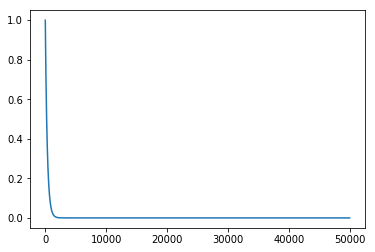

In [101]:
plt.plot(*ml_acf)

In [51]:
msm = pyemma.msm.BayesianMSM(lag=lag, nsamples=1000)
msm.estimate(dtrajs)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2'), max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

BayesianMSM(conf=0.95, connectivity='largest', count_mode='effective',
      dt_traj='1 step', lag=100, mincount_connectivity='1/n',
      nsamples=1000, nsteps=10, reversible=True, show_progress=True,
      sparse=False, statdist_constraint=None)

In [14]:
projection = msm.eigenvectors_right(k=10)[:,1]

In [54]:
msm.samples[0].eigenvectors_right(k=2)[:,1]

MSM(P=array([[1.23347e-01, 1.55137e-03, ..., 1.26763e-04, 1.83250e-03],
       [3.18945e-03, 5.41901e-02, ..., 8.19902e-03, 3.47949e-04],
       ...,
       [1.87910e-04, 5.91177e-03, ..., 4.30765e-01, 0.00000e+00],
       [1.92158e-03, 1.77472e-04, ..., 0.00000e+00, 3.81483e-01]]),
  dt_model=[TimeUnit 100.0 step], neig=100,
  pi=array([0.01033, 0.00503, ..., 0.00697, 0.00986]), reversible=True)

In [116]:
maxtime = 100000

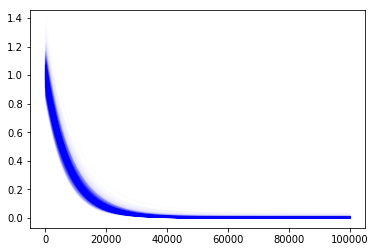

In [128]:
x = msm_acfs[0][0]
for (x,y) in msm_acfs:
    plt.plot(x,y, color='blue', alpha=0.01)

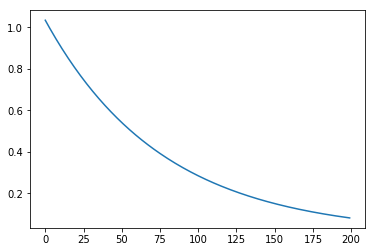

In [72]:
mean = np.mean([s[1] for s in msm_acfs], 0)
plt.plot(mean)

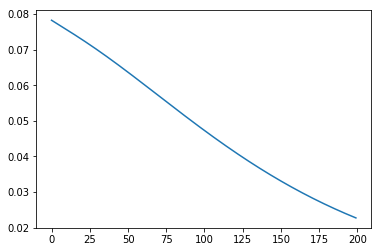

In [73]:
stdev = np.std([s[1] for s in msm_acfs], 0)
plt.plot(stdev)

In [ ]:
plt.plot()

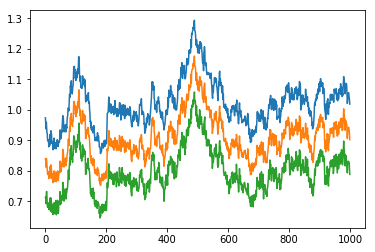

In [67]:
plt.plot([s[1][1] for s in msm_acfs])
plt.plot([s[1][10] for s in msm_acfs])
plt.plot([s[1][20] for s in msm_acfs])

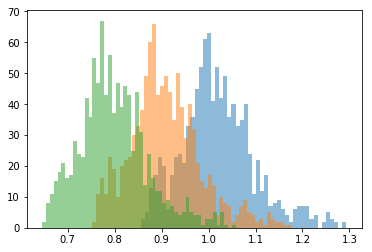

In [77]:
plt.hist([s[1][1] for s in msm_acfs], bins=50,alpha=0.5);
plt.hist([s[1][10] for s in msm_acfs], bins=50,alpha=0.5);
plt.hist([s[1][20] for s in msm_acfs], bins=50,alpha=0.5);

Okay, so should probably use a longer thinning interval

In [63]:
lags = [1,2,3,4,5,10,25,50,100,200,300,400,500,]

In [64]:
msms = []
for lag in lags:
    msm = pyemma.msm.BayesianMSM(lag=lag, nsamples=1000, nsteps=100)
    msm.estimate(dtrajs)
    msms.append(msm)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2'), max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2'), max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2'), max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2'), max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2'), max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2'), max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2'), max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2'), max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2'), max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2'), max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2'), max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2'), max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2'), max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

In [65]:
extra_lags = [1000,2000,3000,4000,5000]

In [66]:
for lag in extra_lags:
    msm = pyemma.msm.BayesianMSM(lag=lag, nsamples=1000, nsteps=100)
    msm.estimate(dtrajs)
    msms.append(msm)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2'), max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2'), max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2'), max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2'), max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2'), max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

In [67]:
all_lags = lags + extra_lags

In [22]:
maxtime = 50000

In [68]:
msm_acfs = [[msm_sample.correlation(projection, maxtime=maxtime) for msm_sample in msm.samples] for msm in msms]

In [ ]:
# to-do: pickle the MSMs and ACFs...

In [70]:
x = msm_acfs[0][0][0]

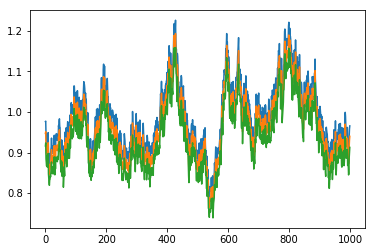

In [69]:
plt.plot([s[1][1] for s in msm_acfs[0]])
plt.plot([s[1][10] for s in msm_acfs[0]])
plt.plot([s[1][20] for s in msm_acfs[0]])

Text(0,0.5,'estimated correlation between $x_t$ and $x_t$\n(should equal 1!)')

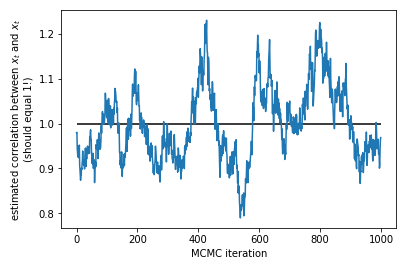

In [92]:
plt.plot([s[1][0] for s in msm_acfs[0]])
plt.hlines(1,0,1000)
plt.xlabel('MCMC iteration')
plt.ylabel(r'estimated correlation between $x_t$ and $x_t$' + '\n(should equal 1!)')

In [30]:
# how are some of these higher than 1...

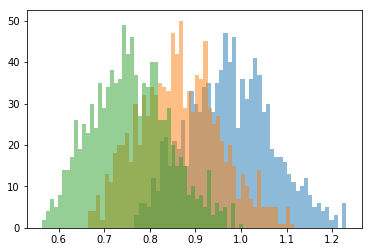

In [31]:
plt.hist([s[1][1] for s in msm_acfs], bins=50,alpha=0.5);
plt.hist([s[1][10] for s in msm_acfs], bins=50,alpha=0.5);
plt.hist([s[1][20] for s in msm_acfs], bins=50,alpha=0.5);

In [ ]:
plt.hist([s[1][1] for s in msm_acfs], bins=50,alpha=0.5);

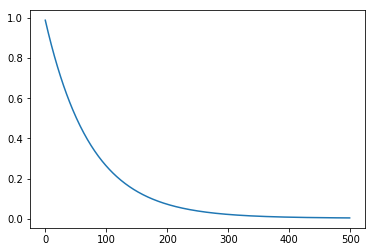

In [32]:
mean = np.mean([s[1] for s in msm_acfs], 0)
plt.plot(mean)

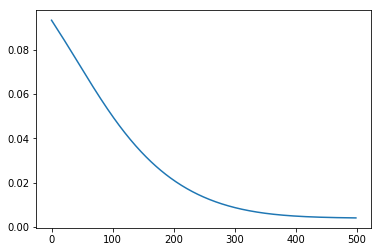

In [33]:
stdev = np.std([s[1] for s in msm_acfs], 0)
plt.plot(stdev)

In [79]:
def plot_band(x, y, yerr, alpha=0.5, color=None, label=None):
    plt.plot(x, y, color=color, label=label)
    plt.fill_between(x, y - yerr, y + yerr, alpha=alpha, color=color)

In [35]:
x.shape, mean.shape, stdev.shape

((500,), (500,), (500,))

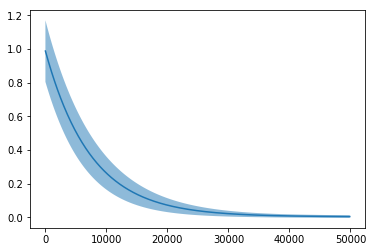

In [36]:
plot_band(x, mean, 1.96 * stdev)

In [37]:
msm.P.shape

(100, 100)

In [38]:
projected_dtrajs = [projection[dtraj] for dtraj in dtrajs]
projected_dtrajs[0][:10]

array([2.15242505, 2.20011583, 2.20011583, 2.20011583, 2.20011583,
       2.20011583, 2.20011583, 2.20011583, 2.20011583, 2.20011583])

In [39]:
stride = int(x[1] - x[0])
stride

100

In [40]:
projected_dtrajs[0].shape

(1044000,)

In [135]:
raw_acf = acf(projected_dtrajs, stride=stride, max_lag=maxtime)

In [136]:
len(projected_dtrajs[0]), maxtime # that warning is wrong, I think...

(1044000, 100000)

In [137]:
raw_acf.shape

(10440, 1)

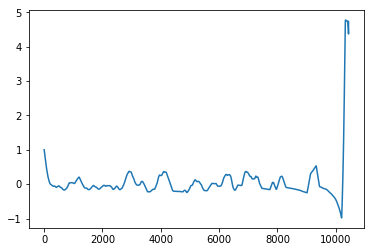

In [138]:
plt.plot(raw_acf)

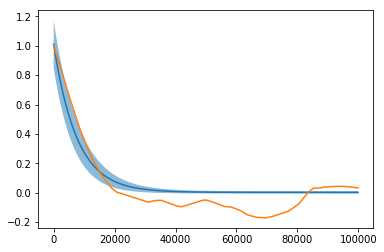

In [140]:
plot_band(x, mean, 1.96 * stdev)
plt.plot(x, raw_acf[:len(x)])

In [71]:
from statsmodels.tsa.stattools import acf

In [72]:
%%time
raw_acf, confint = acf(x=projected_dtrajs[0], nlags=int(max(x)), fft=True, alpha=0.05)

CPU times: user 372 ms, sys: 288 ms, total: 660 ms
Wall time: 868 ms


In [74]:
len(projected_dtrajs), len(projected_dtrajs[0])

(1, 1044000)

In [82]:
len(all_lags)

18

In [85]:
18 / 3

6.0

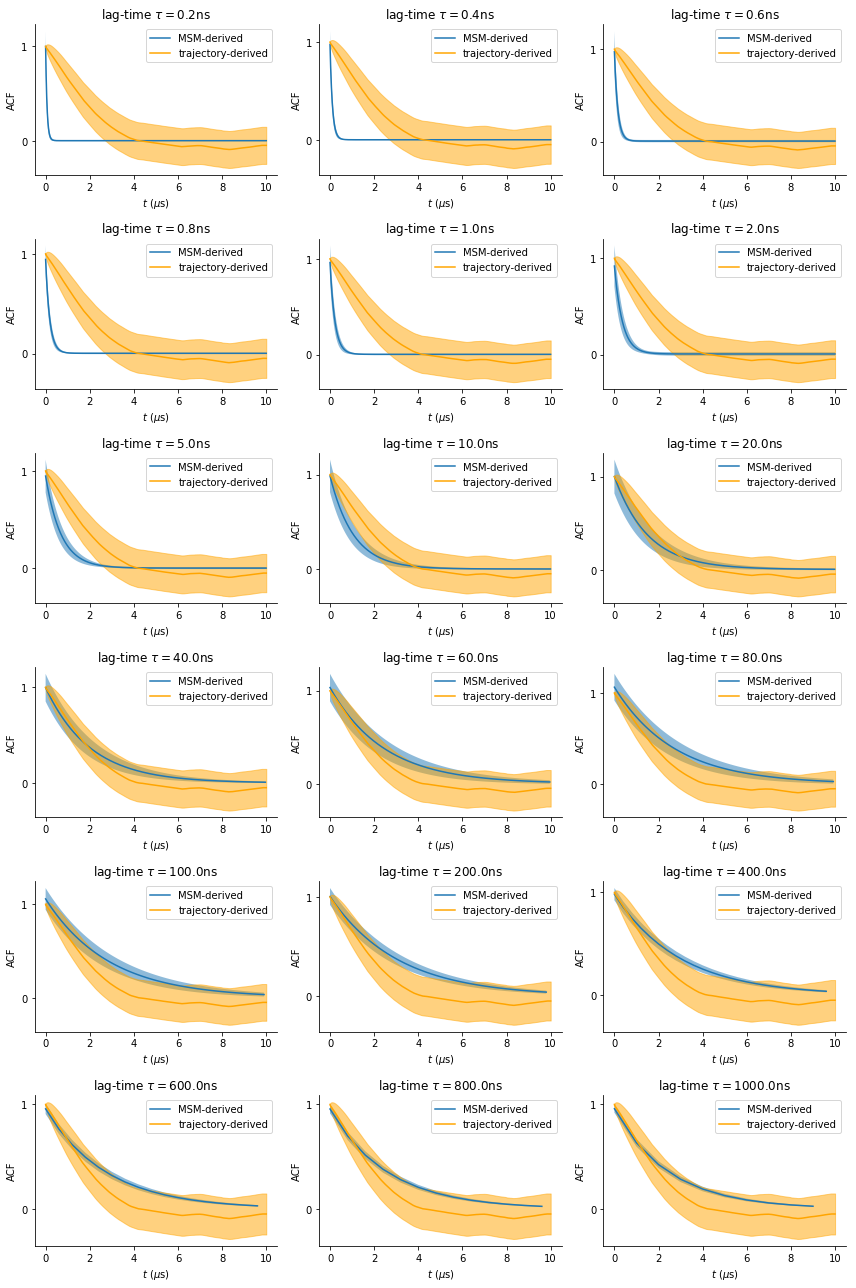

In [87]:
width = 4
height = 3
plt.figure(figsize=(3 * width, 6 * height))

for i in range(len(all_lags)):
    ax = plt.subplot(6,3,i + 1)
    plt.title(r'lag-time $\tau=$' + '{}ns'.format(all_lags[i] / 5))
    x = msm_acfs[i][0][0]
    mean = np.mean([s[1] for s in msm_acfs[i]], 0)
    stdev = np.std([s[1] for s in msm_acfs[i]], 0)
    plt.xlabel(r'$t$ ' + r'($\mu$s)')
    plt.ylabel('ACF')
    plt.yticks([0,1])

    plot_band(np.array(x) * 0.0002, mean, 1.96 * stdev, label='MSM-derived')
    plot_band(np.arange(len(raw_acf)) * 0.0002, raw_acf, np.abs(confint[:,1] - confint[:,0])/2, color='orange', label='trajectory-derived')
    plt.legend()
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('trp-cage-acfs.png', dpi=300, bbox_inches='tight')

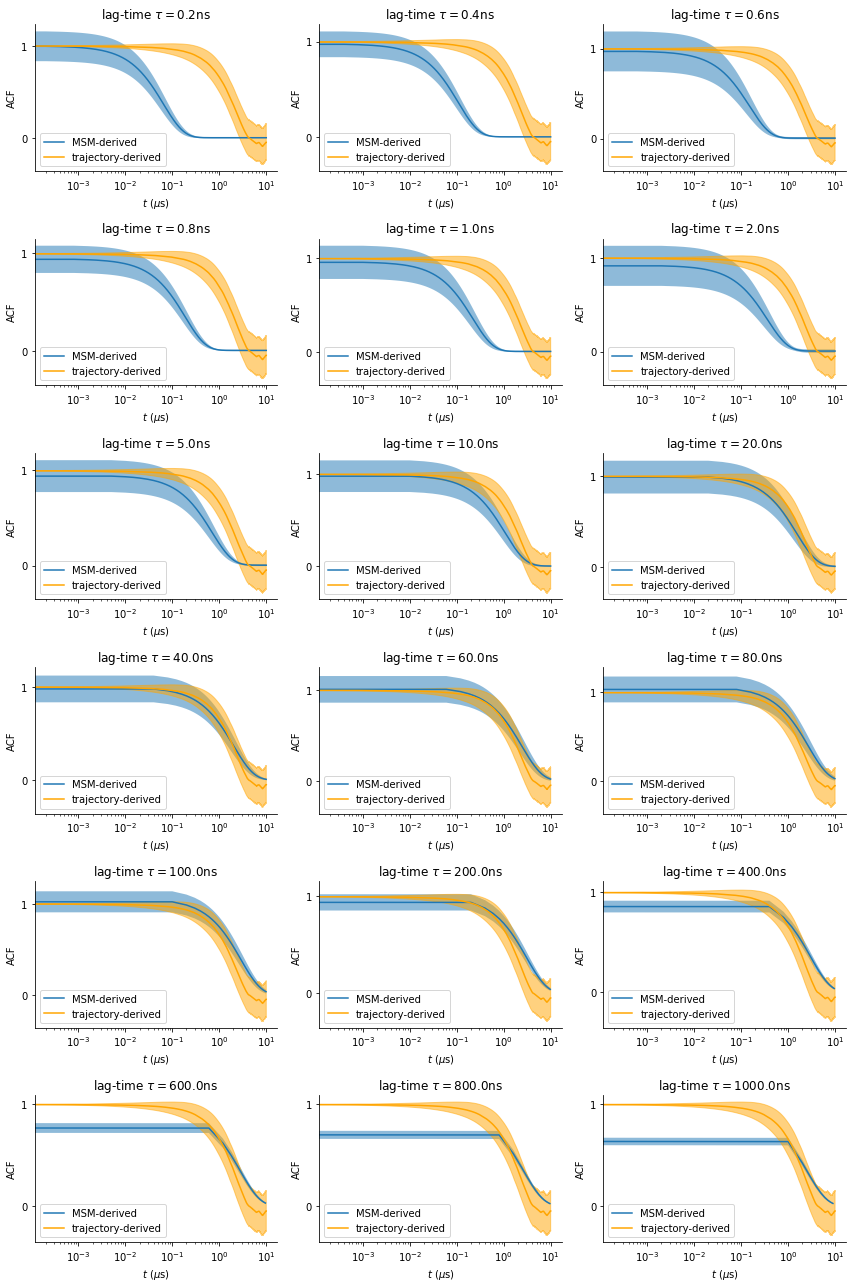

In [93]:
width = 4
height = 3
plt.figure(figsize=(3 * width, 6 * height))

for i in range(len(all_lags)):
    ax = plt.subplot(6,3,i + 1)
    plt.title(r'lag-time $\tau=$' + '{}ns'.format(all_lags[i] / 5))
    x = msm_acfs[i][0][0]
    mean = np.mean([s[1] for s in msm_acfs[i]], 0)
    stdev = np.std([s[1] for s in msm_acfs[i]], 0)
    plt.xlabel(r'$t$ ' + r'($\mu$s)')
    plt.ylabel('ACF')
    plt.yticks([0,1])

    plot_band(np.array(x) * 0.0002, mean, 1.96 * stdev, label='MSM-derived')
    plot_band(np.arange(len(raw_acf)) * 0.0002, raw_acf, np.abs(confint[:,1] - confint[:,0])/2, color='orange', label='trajectory-derived')
    plt.legend()
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.xscale('log')
plt.tight_layout()
plt.savefig('trp-cage-acfs-log-xscale.png', dpi=300, bbox_inches='tight')

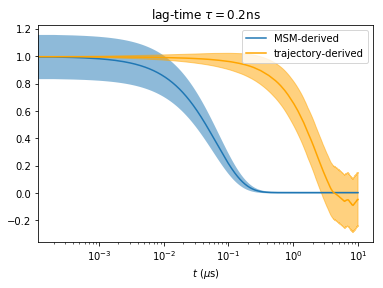

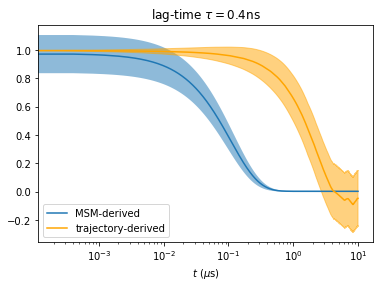

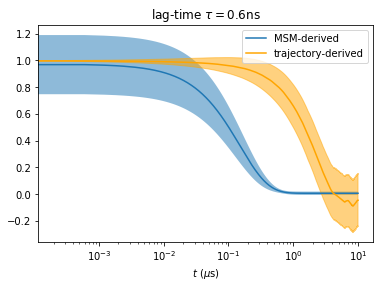

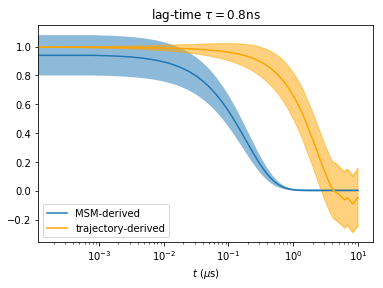

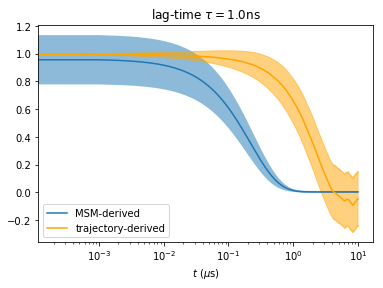

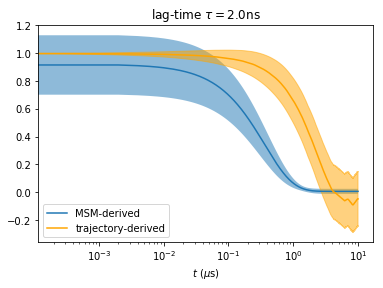

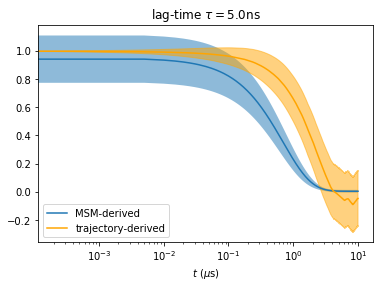

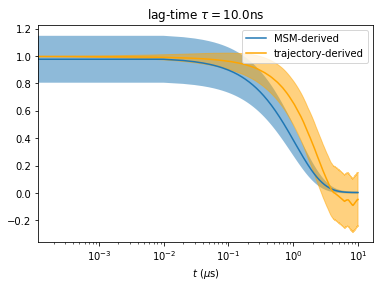

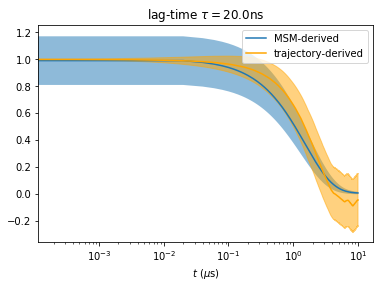

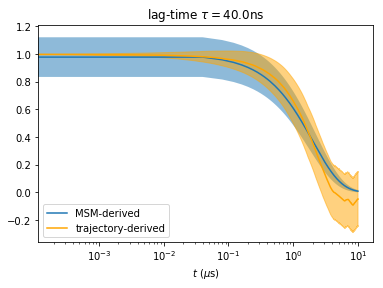

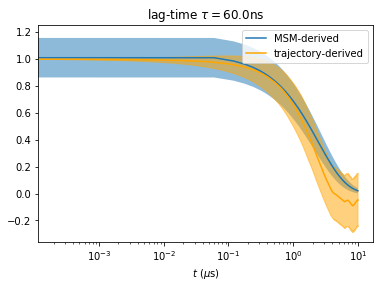

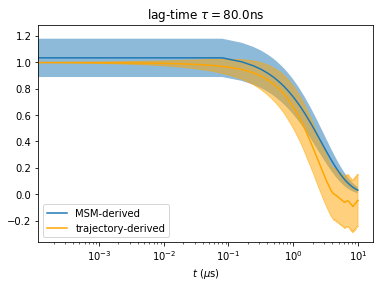

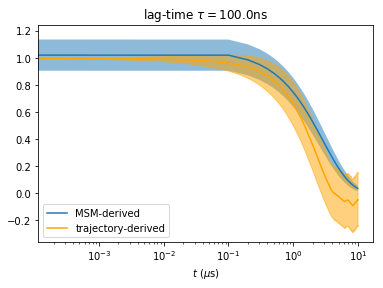

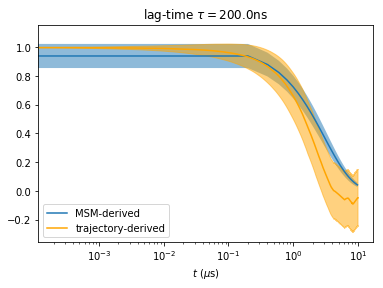

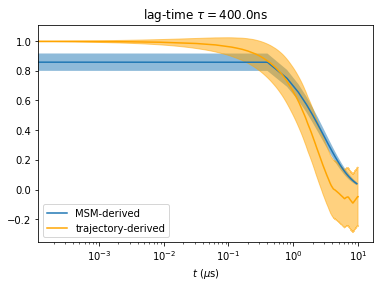

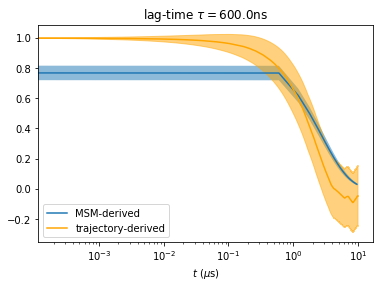

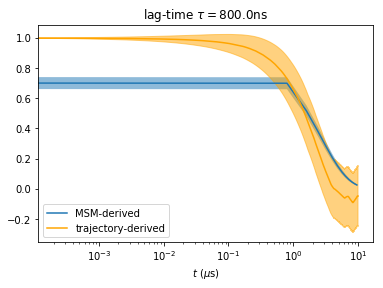

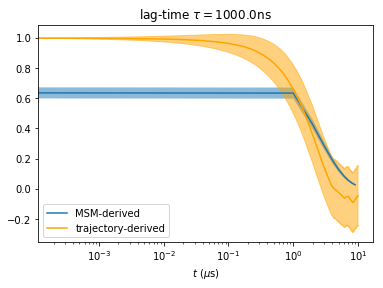

In [81]:
for i in range(len(all_lags)):
    plt.figure()
    plt.title(r'lag-time $\tau=$' + '{}ns'.format(all_lags[i] / 5))
    x = msm_acfs[i][0][0]
    mean = np.mean([s[1] for s in msm_acfs[i]], 0)
    stdev = np.std([s[1] for s in msm_acfs[i]], 0)
    plt.xlabel(r'$t$ ' + r'($\mu$s)')

    plot_band(np.array(x) * 0.0002, mean, 1.96 * stdev, label='MSM-derived')
    plot_band(np.arange(len(raw_acf)) * 0.0002, raw_acf, np.abs(confint[:,1] - confint[:,0])/2, color='orange', label='trajectory-derived')
    plt.legend()
    plt.xscale('log')

In [105]:
ml_msms = []
ml_acfs = []
for lag in all_lags:
    msm = pyemma.msm.estimate_markov_model(dtrajs, lag=lag)
    ml_msms.append(msm)
    ml_acfs.append(msm.correlation(projection, maxtime=maxtime))

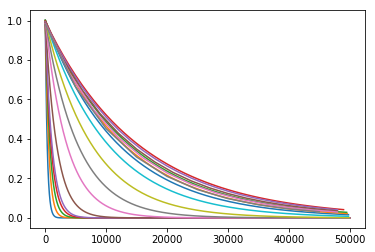

In [106]:
for (x,y) in ml_acfs:
    plt.plot(x,y)

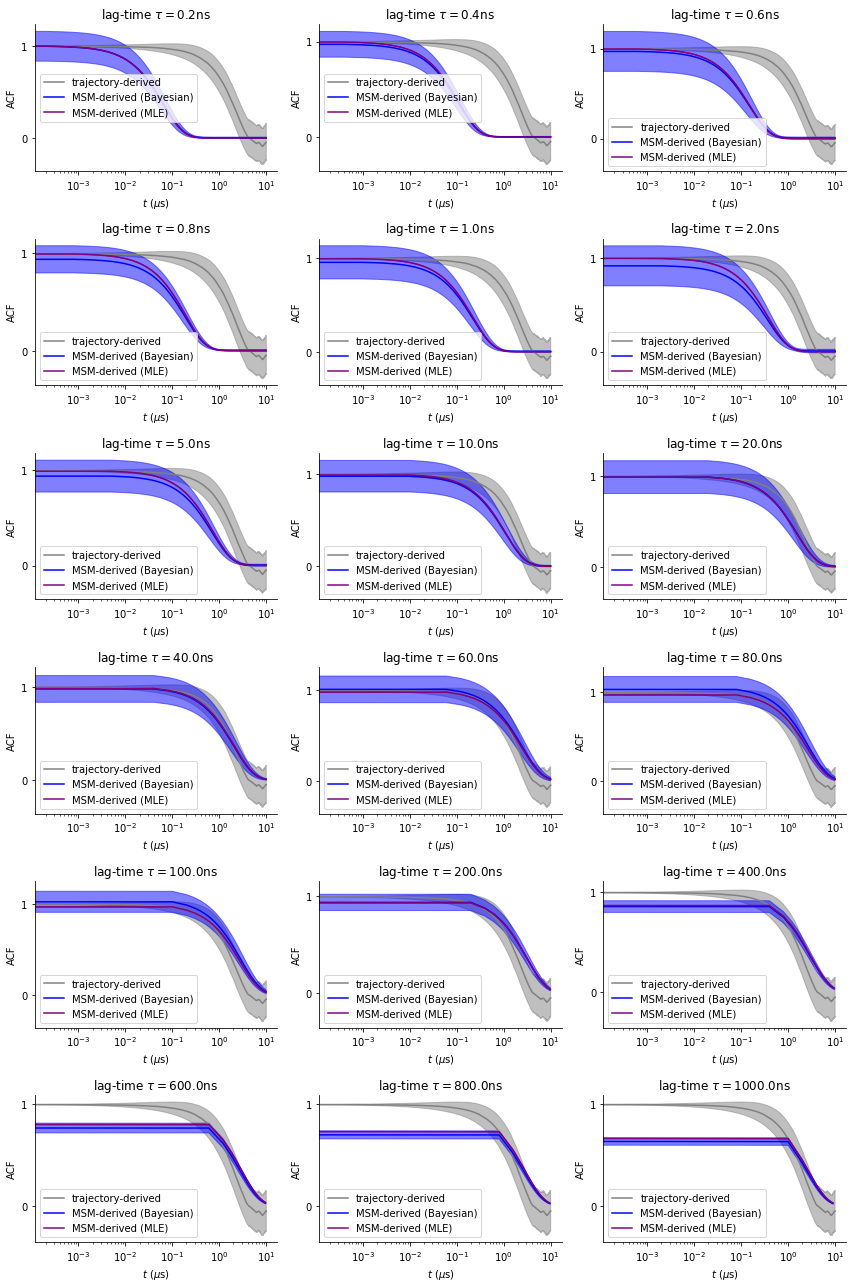

In [217]:
def plot_ACFs(msm_acfs, raw_acf, confint, ml_acfs, log_x_scale=False):
    width = 4
    height = 3
    plt.figure(figsize=(3 * width, 6 * height))

    for i in range(len(all_lags)):
        ax = plt.subplot(6,3,i + 1)
        plt.title(r'lag-time $\tau=$' + '{}ns'.format(all_lags[i] / 5))
        x = msm_acfs[i][0][0]
        mean = np.mean([s[1] for s in msm_acfs[i]], 0)
        stdev = np.std([s[1] for s in msm_acfs[i]], 0)
        plt.xlabel(r'$t$ ' + r'($\mu$s)')
        plt.ylabel('ACF')
        plt.yticks([0,1])

        # trajectory-derived
        plot_band(np.arange(len(raw_acf)) * 0.0002, raw_acf, np.abs(confint[:,1] - confint[:,0])/2, color='gray', label='trajectory-derived')

        # Bayesian MSM
        plot_band(np.array(x) * 0.0002, mean, 1.96 * stdev, color='blue', label='MSM-derived (Bayesian)')

        # maximum-likelihood MSM
        (x,y) = ml_acfs[i]
        plot_band(np.array(x) * 0.0002, y, 0, color='purple', label='MSM-derived (MLE)')


        plt.legend()

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        if log_x_scale:
            plt.xscale('log')
    plt.tight_layout()

plot_ACFs(msm_acfs, raw_acf, confint, ml_acfs, log_x_scale=True)
plt.savefig('trp-cage-acfs-log-xscale.png', dpi=300, bbox_inches='tight')

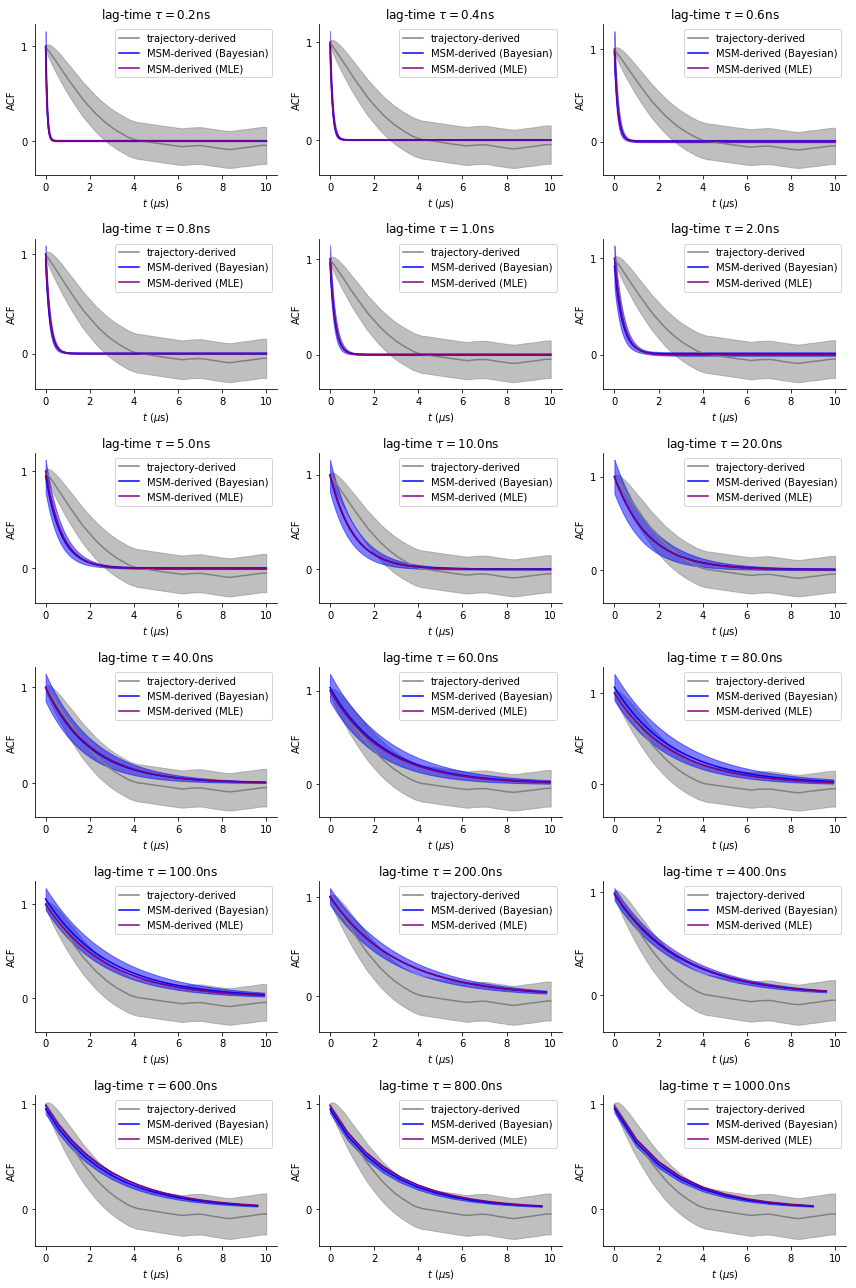

In [218]:
plot_ACFs(msm_acfs, raw_acf, confint, ml_acfs, log_x_scale=False)
plt.savefig('trp-cage-acfs-linear-xscale.png', dpi=300, bbox_inches='tight')

In [223]:
max(x)

45000.0

In [225]:
confint.shape

(50000, 2)

In [230]:
def get_acfs(dtrajs):
    """compute acfs for the slowest identified projections, using bayesian msms, mle msms, and the raw sequences"""
    
    # project
    msm = pyemma.msm.estimate_markov_model(dtrajs, lag=100)
    projection = msm.eigenvectors_right(k=10)[:,1]
    projected_dtrajs = [projection[dtraj] for dtraj in dtrajs]
    
    # raw
    from statsmodels.tsa.stattools import acf
    if len(projected_dtrajs) == 1:
    
        raw_acf, confint = acf(x=projected_dtrajs[0], nlags=int(max(x)), fft=True, alpha=0.05)
    else:
        raw_acf, confint = acf(x=projected_dtrajs[0], nlags=int(max(x)), fft=True, alpha=0.05)
        for i in range(1, len(projected_dtrajs)):
            raw_acf_, confint_ = acf(x=projected_dtrajs[i], nlags=int(max(x)), fft=True, alpha=0.05)
            raw_acf += raw_acf_
            confint += confint_
        raw_acf /= len(projected_dtrajs)
        confint /= len(projected_dtrajs)
    
    # bayesian msms + acfs
    msms = []
    for lag in all_lags:
        print('bayesian msm at lag={}'.format(lag))
        msm = pyemma.msm.BayesianMSM(lag=lag, nsamples=100, nsteps=100)
        msm.estimate(dtrajs)
        msms.append(msm)
    msm_acfs = [[msm_sample.correlation(projection, maxtime=maxtime) for msm_sample in msm.samples] for msm in msms]
    
    # mle msms + acfs
    ml_msms = []
    ml_acfs = []
    for lag in all_lags:
        msm = pyemma.msm.estimate_markov_model(dtrajs, lag=lag)
        ml_msms.append(msm)
        ml_acfs.append(msm.correlation(projection, maxtime=maxtime))
        
    return msm_acfs, raw_acf, confint, ml_acfs

In [231]:
results = [get_acfs(dtrajs) for dtrajs in systems]

bayesian msm at lag=1


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=2


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=3


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=4


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=5


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=10


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=25


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=50


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=100


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=200


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=300


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=400


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=500


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=1000


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=2000


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=3000


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=4000


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=5000


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=1


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=2


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=3


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=4


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=5


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=10


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=25


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=50


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=100


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=200


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=300


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=400


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=500


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=1000


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=2000


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=3000


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=4000


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=5000


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=1


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=2


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=3


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=4


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=5


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=10


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=25


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=50


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=100


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=200


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=300


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=400


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=500


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=1000


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=2000


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=3000


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=4000


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=5000


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=1


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=2


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=3


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=4


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=5


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=10


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=25


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=50


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=100


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=200


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=300


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=400


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=500


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=1000


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=2000


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=3000


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=4000


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

bayesian msm at lag=5000


HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, layout=Layout(flex='2')), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='inline-flex', flex_flow='row wrap', width='100%'))

In [233]:
from pickle import dump

with open('acf_results.pkl', 'wb') as f:
    dump(results, f)

In [237]:
fnames

['dtrajs_ntl9_lag10ns.npy',
 'dtrajs_villin_lag10ns.npy',
 'chignolin_dtrajs_lag10ns.npy',
 'dtrajs_trpcage_lag10ns.npy']

In [238]:
names = ['NTL9', 'villin', 'chignolin', 'trp-cage']

In [240]:
for i, result in enumerate(results):
    plot_ACFs(*result, log_x_scale=True)
    plt.savefig('{}_acfs_logscale.png'.format(names[i]), bbox_inches='tight', dpi=300)
    plt.close()

In [179]:
def signed_area_between_two_curves(x, y1, y2):
    return np.trapz(y2 - y1, x)

In [183]:
x1, y1 = ml_acfs[0]
x2, y2 = ml_acfs[1]

#signed_area_between_two_curves(x, y1, y2)

In [184]:
x1.shape, x2.shape

((50000,), (25000,))

In [186]:
y2_on_x1 = np.interp(x1, x2, y2)

signed_area_between_two_curves(x1, y1, y2_on_x1)

226.57076149715022

In [ ]:
np.arange(len(raw_acf)) * 0.0002, raw_acf

In [207]:
def compare_to_raw_acf(raw_acf, x, y):
    raw_range = np.arange(len(raw_acf))
    
    y_on_raw_range = np.interp(raw_range, x, y)
    
    #print(raw_range.shape, x.shape, y.shape, y_on_raw_range.shape)
    
    return signed_area_between_two_curves(raw_range * 0.0002, raw_acf, y_on_raw_range)

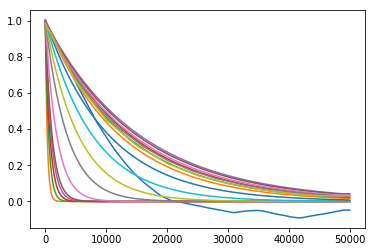

In [208]:
raw_range = np.arange(len(raw_acf))
plt.plot(raw_range, raw_acf)
for i in range(len(ml_acfs)):
    x,y = ml_acfs[i]
    y_on_raw_range = np.interp(raw_range, x, y)
    plt.plot(raw_range, y_on_raw_range)

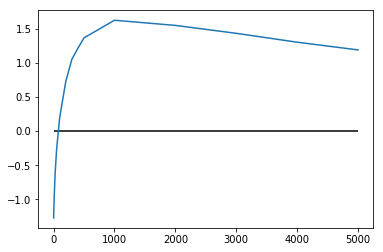

In [209]:
plt.plot(all_lags, [compare_to_raw_acf(raw_acf, *entry) for entry in ml_acfs])
plt.hlines(0,min(all_lags), max(all_lags))

In [210]:
ml_acfs[0]

(array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 4.9997e+04, 4.9998e+04,
        4.9999e+04]),
 array([9.99043619e-01, 9.95745750e-01, 9.92501648e-01, ...,
        2.83815345e-07, 2.83815345e-07, 2.83815345e-07]))

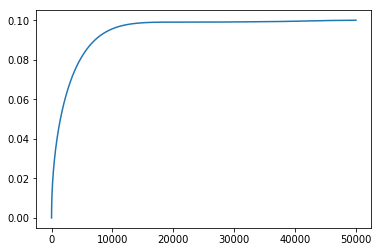

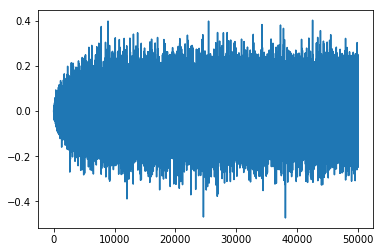

In [211]:
raw_stdev = (np.abs(confint[:,1] - confint[:,0])/2) / 1.96

raw_noise = lambda : np.random.randn(len(raw_stdev)) * raw_stdev

plt.plot(raw_stdev)
plt.figure()
plt.plot(raw_noise())

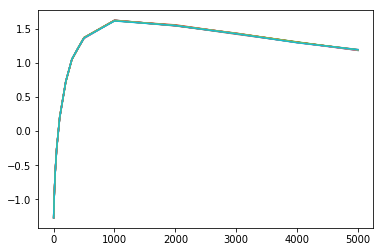

In [212]:
for _ in range(10):
    plt.plot(all_lags, [compare_to_raw_acf(raw_acf + raw_noise(), *entry) for entry in ml_acfs])

In [215]:
x,y = ml_acfs[-1]
compare_to_raw_acf(raw_acf + raw_noise(), x, y)

1.192459105435308

In [216]:
compare_to_raw_acf(raw_acf + raw_noise(), x, y)

1.1940986713112973

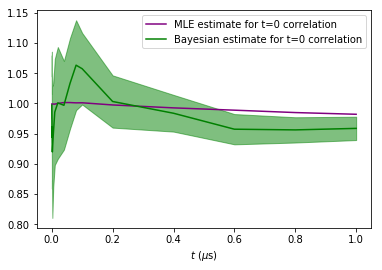

In [213]:
plt.plot(np.array(all_lags) * 0.0002, [a[1][0] for a in ml_acfs], label='MLE estimate for t=0 correlation', color='purple')
mean = np.array([np.mean([s[1] for s in a], 0)[0] for a in msm_acfs])
stdev = np.array([np.std([s[1] for s in a], 0)[0] for a in msm_acfs])
plot_band(np.array(all_lags) * 0.0002, mean, stdev, label='Bayesian estimate for t=0 correlation', color='green')
plt.xlabel(r'$t$ ' + r'($\mu$s)')

plt.legend()

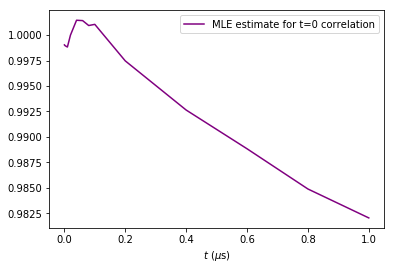

In [126]:

plt.plot(np.array(all_lags) * 0.0002, [a[1][0] for a in ml_acfs], label='MLE estimate for t=0 correlation', color='purple')
plt.xlabel(r'$t$ ' + r'($\mu$s)')
plt.legend()

In [146]:
msm_sample = msms[-1].samples[500]
msm_sample.correlation(projection, maxtime=1)

(array([0.]), array([0.96718133]))

In [150]:
ml_msm = ml_msms[-1]
ml_msm.correlation(projection, maxtime=1)

(array([0.]), array([0.98203669]))

In [148]:
np.linalg.norm(projection)

6.989898277391501

In [149]:
np.sum(np.abs(projection))

57.31565300638235

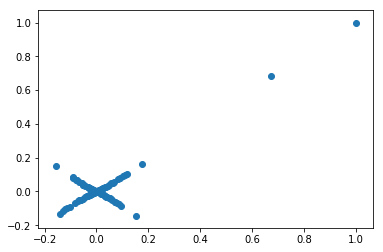

In [151]:
plt.scatter(msm_sample.eigenvalues(), ml_msm.eigenvalues())

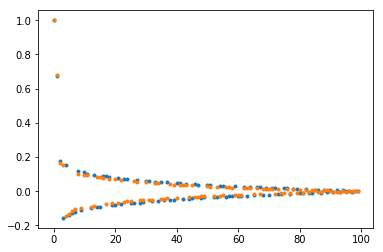

In [153]:
plt.plot(msm_sample.eigenvalues(), '.')
plt.plot(ml_msm.eigenvalues(), '.')


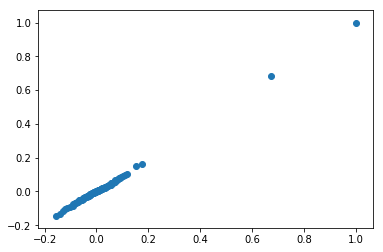

In [154]:
plt.scatter(sorted(msm_sample.eigenvalues()), sorted(ml_msm.eigenvalues()))

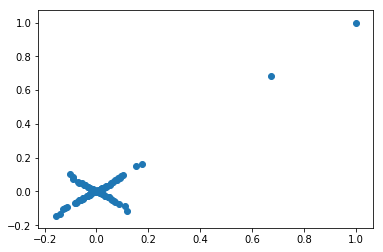

In [160]:
plt.scatter(np.linalg.eigvals(msm_sample.P), np.linalg.eigvals(ml_msm.P))

In [164]:
np.linalg.eigvals(msm_sample.P)[0]

0.9999999999999982

In [ ]:
mean

In [ ]:
np.trapz()

In [165]:
msm_sample.P.shape

(100, 100)

In [166]:
projection.shape

(100,)

In [168]:
def compute_acf(a, P, pi, k):
    return np.dot(a, np.diag(pi)), np.dot(np.linalg.matrix_power(P, k))
np.dot(msm_sample.P, projection)

array([-0.38479428, -0.36758331, -0.30250854,  1.39296125, -0.3243423 ,
       -0.37462305, -0.36673016, -0.28429908, -0.36057328, -0.33181118,
       -0.33068939, -0.44317627, -0.44514733, -0.28816319,  1.39828571,
       -0.33453462, -0.29180807, -0.27456036, -0.34764669, -0.30352573,
       -0.23705567, -0.31823723, -0.43086388,  1.48553198, -0.36049027,
       -0.37671327, -0.36370506, -0.27979723, -0.26691848, -0.32584312,
       -0.28569087, -0.33308789, -0.42441312, -0.27138864, -0.22220106,
       -0.14965146, -0.30957561,  1.47737364, -0.26211318, -0.33757016,
       -0.30617727, -0.38121346, -0.00367547, -0.24002722,  0.37148007,
       -0.19533766, -0.46276922, -0.32028059, -0.34237814, -0.40629456,
       -0.3313584 , -0.30448756, -0.36400055, -0.34414254, -0.29601844,
       -0.2387119 ,  1.46843222, -0.31336737, -0.2609233 , -0.36166827,
       -0.34538994, -0.2924419 , -0.28820366, -0.4287938 , -0.36154997,
       -0.38650422,  0.84779456, -0.33996407, -0.35245481, -0.18

In [176]:
pi = msm_sample.pi
P = msm_sample.P

In [177]:
np.dot(np.dot(projection, np.diag(pi)), projection)

0.9671813271387719

In [178]:
sum(pi)

0.9999999999999996

In [171]:
np.linalg.norm(np.linalg.matrix_power(msm.P, 1) - msm.P)

0.0

In [173]:
np.linalg.norm(np.linalg.matrix_power(msm.P, 0) - np.eye(len(msm.P)))

0.0